In [71]:
import pandas as pd
import numpy as np

In [183]:
christmas_pdf=pd.read_excel(r'C:\Users\Owner\Documents\christmas_movie_list.xlsx', 
              dtype={'title': str, 'year': int, 'links': str})

christmas_pdf.drop(columns = ['links'], inplace = True)

In [115]:
christmas_pdf.head()

,title,year
0,3 Holiday Tails,2011
1,1000 Miles from Christmas,2021
2,12 Dates of Christmas,2011
3,12 Days of Christmas Eve,2004
4,12 Days of Giving,2017


In [184]:
christmas_pdf.count()

title    1316
year     1316
dtype: int64

In [189]:
imdb_df = pd.read_csv(r'C:\Users\Owner\Documents\title_basics.tsv', 
                      sep='\t',
                      na_values = r'\N',
                      dtype = {'startYear': pd.Int64Dtype()}
                     )

imdb_df['genres_list'] = imdb_df['genres'].str.split(',')
imdb_df.drop(columns = ['genres','endYear','isAdult'], inplace = True)
imdb_df.dropna(subset=['startYear'], inplace=True)

imdb_df.dtypes

C:\Users\Owner\AppData\Local\Temp\ipykernel_9408\2980829337.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  imdb_df = pd.read_csv(r'C:\Users\Owner\Documents\title_basics.tsv',


tconst            object
titleType         object
primaryTitle      object
originalTitle     object
startYear          Int64
runtimeMinutes    object
genres_list       object
dtype: object

In [192]:
imdb_movie_df=imdb_df
#[imdb_df['titleType'].isin(['tvMovie','movie'])]

In [193]:
main_pdf = pd.merge(christmas_pdf, imdb_movie_df.rename(columns={'primaryTitle':'title','startYear':'year'}), on=['title','year'],  how='inner')
main_pdf=main_pdf[['tconst', 'year', 'title','originalTitle','titleType','runtimeMinutes','genres_list']]
main_pdf.count()

tconst            1158
year              1158
title             1158
originalTitle     1158
titleType         1158
runtimeMinutes    1037
genres_list       1153
dtype: int64

In [194]:
main_pdf.head()

,tconst,year,title,originalTitle,titleType,runtimeMinutes,genres_list
0,tt1942787,2011,3 Holiday Tails,3 Holiday Tails,tvMovie,88.0,"[Comedy, Family, Romance]"
1,tt13782052,2021,1000 Miles from Christmas,A mil kilómetros de la Navidad,movie,102.0,"[Comedy, Romance]"
2,tt1846442,2011,12 Dates of Christmas,12 Dates of Christmas,tvMovie,90.0,"[Comedy, Family, Fantasy]"
3,tt6303962,2017,12 Days of Giving,12 Days of Giving,tvMovie,85.0,"[Comedy, Drama, Family]"
4,tt3579698,2014,12 Dog Days Till Christmas,12 Dog Days of Christmas,movie,90.0,"[Comedy, Drama, Family]"


In [143]:
ratings_df = pd.read_csv(r'C:\Users\Owner\Documents\title_ratings.tsv', 
                      sep='\t',
                      na_values = r'\N'
                     )

In [160]:
ratings_df.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1922
1,tt0000002,5.8,259
2,tt0000003,6.5,1734
3,tt0000004,5.6,174
4,tt0000005,6.2,2545


In [195]:
main_pdf=main_pdf.merge(ratings_df, on='tconst', how = 'inner')

In [166]:
main_pdf.head()

,tconst,year,title,originalTitle,titleType,runtimeMinutes,genres_list,averageRating,numVotes
0,tt1942787,2011,3 Holiday Tails,3 Holiday Tails,tvMovie,88.0,"[Comedy, Family, Romance]",5.6,788
1,tt13782052,2021,1000 Miles from Christmas,A mil kilómetros de la Navidad,movie,102.0,"[Comedy, Romance]",5.8,1555
2,tt1846442,2011,12 Dates of Christmas,12 Dates of Christmas,tvMovie,90.0,"[Comedy, Family, Fantasy]",6.3,6904
3,tt6303962,2017,12 Days of Giving,12 Days of Giving,tvMovie,85.0,"[Comedy, Drama, Family]",6.0,943
4,tt3579698,2014,12 Dog Days Till Christmas,12 Dog Days of Christmas,movie,90.0,"[Comedy, Drama, Family]",4.7,473


<AxesSubplot:xlabel='year'>

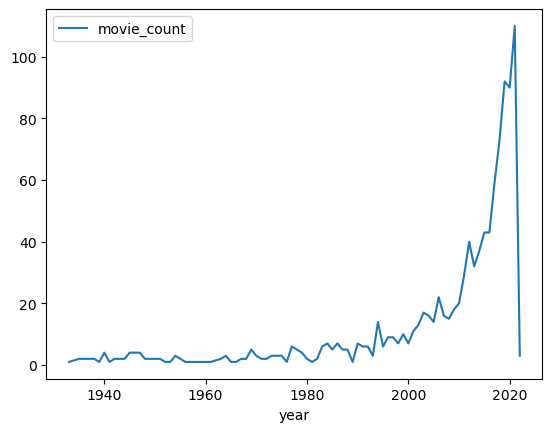

In [196]:
movies_per_year = main_pdf[['tconst','year']].groupby('year').count()
movies_per_year=movies_per_year.rename(columns={"tconst": "movie_count"})
movies_per_year.plot()

<AxesSubplot:xlabel='year'>

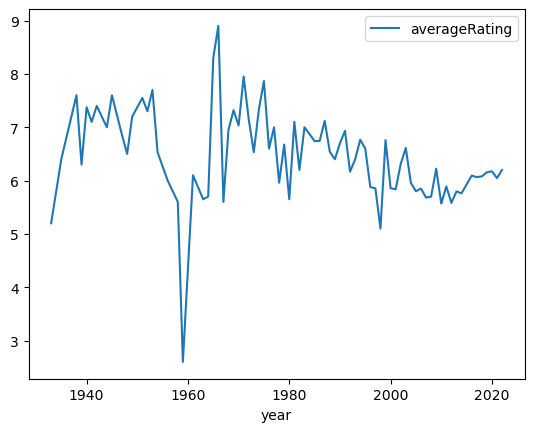

In [197]:
ratings_per_year = main_pdf[['averageRating','year']].groupby('year', dropna=True).mean()
ratings_per_year.plot()

<AxesSubplot:xlabel='year'>

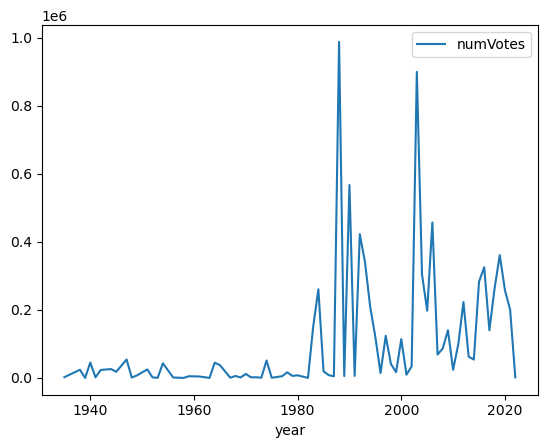

In [174]:
reviews_per_year = main_pdf[['numVotes','year']].groupby('year', dropna=True).sum()
reviews_per_year.plot()

In [180]:
main_pdf[['numVotes']].quantile(0.2)

numVotes    444.2
Name: 0.2, dtype: float64

In [181]:
main_pdf[main_pdf['numVotes']>444].sort_values(by=['averageRating','numVotes'],ascending=False)

,tconst,year,title,originalTitle,titleType,runtimeMinutes,genres_list,averageRating,numVotes
24,tt0059026,1965,A Charlie Brown Christmas,A Charlie Brown Christmas,tvMovie,25.0,"[Animation, Comedy, Drama]",8.3,37734
818,tt0067209,1971,The Homecoming: A Christmas Story,The Homecoming: A Christmas Story,tvMovie,100.0,"[Drama, Family]",8.3,1820
423,tt0095016,1988,Die Hard,Die Hard,movie,132.0,"[Action, Thriller]",8.2,872646
541,tt4729430,2019,Klaus,Klaus,movie,96.0,"[Adventure, Animation, Comedy]",8.1,148542
29,tt0044008,1951,A Christmas Carol,Scrooge,movie,86.0,"[Drama, Family, Fantasy]",8.1,22947
...,...,...,...,...,...,...,...,...,...
674,tt3922810,2014,Santa Claws,Santa Claws,movie,86,"[Family, Fantasy]",3.0,812
672,tt0058548,1964,Santa Claus Conquers the Martians,Santa Claus Conquers the Martians,movie,81.0,"[Adventure, Comedy, Family]",2.6,11851
671,tt0053241,1959,Santa Claus,Santa Claus,movie,94.0,"[Comedy, Family, Fantasy]",2.6,4960
679,tt0117550,1996,Santa with Muscles,Santa with Muscles,movie,97.0,[Comedy],2.5,9100


In [198]:
main_pdf.to_csv('christmas_movie_list_with_tconst.csv')